Epoch 1/20
187/187 - 1s - loss: 0.0082 - 530ms/epoch - 3ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0050 - 120ms/epoch - 641us/step
Epoch 3/20
187/187 - 0s - loss: 0.0049 - 118ms/epoch - 632us/step
Epoch 4/20
187/187 - 0s - loss: 0.0048 - 119ms/epoch - 639us/step
Epoch 5/20
187/187 - 0s - loss: 0.0046 - 119ms/epoch - 637us/step
Epoch 6/20
187/187 - 0s - loss: 0.0044 - 119ms/epoch - 638us/step
Epoch 7/20
187/187 - 0s - loss: 0.0047 - 119ms/epoch - 637us/step
Epoch 8/20
187/187 - 0s - loss: 0.0044 - 119ms/epoch - 637us/step
Epoch 9/20
187/187 - 0s - loss: 0.0045 - 119ms/epoch - 638us/step
Epoch 10/20
187/187 - 0s - loss: 0.0044 - 286ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0046 - 188ms/epoch - 1ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0044 - 343ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0044 - 122ms/epoch - 654us/step
Epoch 14/20
187/187 - 0s - loss: 0.0042 - 119ms/epoch - 635us/step
Epoch 15/20
187/187 - 0s - loss: 0.0043 - 119ms/epoch - 638us/step
Epoch 16/20


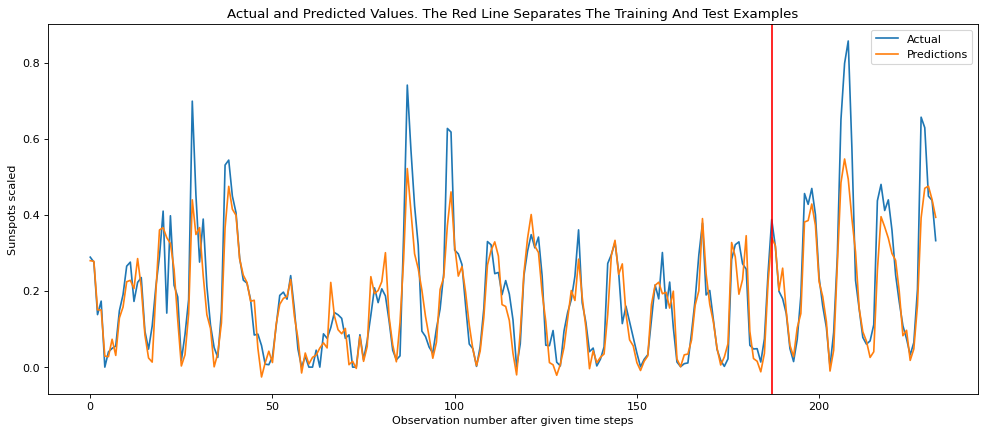

In [1]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler

# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model 

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
time_steps = 12
train_data, test_data, data = get_train_test(sunspots_url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)